# Pointer with ArUco Markers

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from skimage import io
from PIL import Image
from scripts.cv2_imshow import cv2_imshow
import sys

sys.path.append('.venv/Lib/site-packages/')

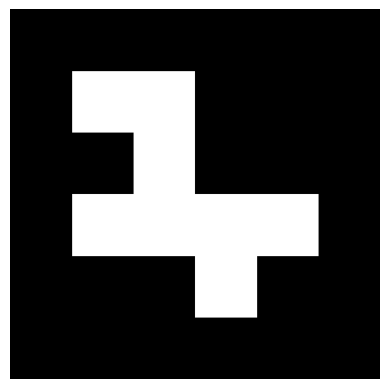

In [2]:
# Generate Marker

myDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
img = cv2.aruco.generateImageMarker(myDict, 7, 500)
cv2.imwrite(f'img/pointer-marker.png', img)

cv2_imshow(img)

In [3]:
# load camera matrix and distortion coefficients
calibration = np.load("data\calibration_OBS.npz")
MARKER_LENGTH = 0.015
cameraMatrix = calibration['cameraMatrix']
distCoeffs = calibration['distCoeffs']

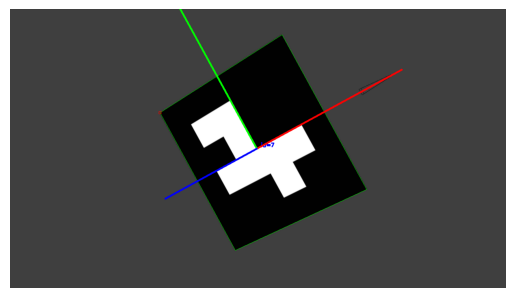

In [4]:
# Detect Marker and estimate pose

img = cv2.imread('img/blender-captures/pointer-test-3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, arucoDict)
out = img.copy()
out = cv2.aruco.drawDetectedMarkers(out, corners, ids)

# estimate pose
rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, MARKER_LENGTH, cameraMatrix, distCoeffs)
out = cv2.drawFrameAxes(out, cameraMatrix, distCoeffs, rvecs, tvecs, MARKER_LENGTH)

cv2_imshow(out)

In [10]:
corners

(array([[[404., 279.],
         [733.,  69.],
         [961., 486.],
         [607., 650.]]], dtype=float32),)

In [5]:
print(f"rvecs: {rvecs}")
print(f"tvecs: {tvecs}")

rvecs: [[[-2.83625084  0.73105336  0.76676355]]]
tvecs: [[[0.00079366 0.00056146 0.05976369]]]


In [8]:
rvecs

array([[[-2.83625084,  0.73105336,  0.76676355]]])

In [6]:
# define a method to rotate the translation vector relative to the rotation vector
def rotate_vector(vector, rotation_vector):
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)
    rotation_matrix = np.transpose(rotation_matrix)
    rotated_vector = np.dot(vector, rotation_matrix)
    return rotated_vector

point_tvecs: [[[ 0.01213238 -0.00577046  0.05225768]]]
point_rvecs: [[[-2.83625084  0.73105336  0.76676355]]]


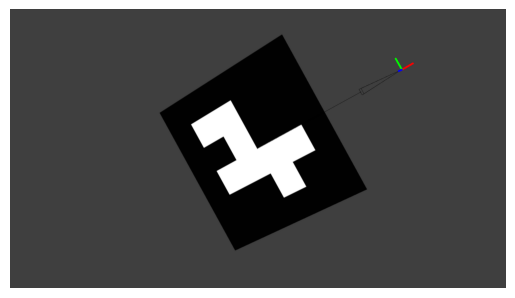

In [7]:
# estimate pointer position

point_rel_tvecs = [[[MARKER_LENGTH, 0.0, 0.0]]]
point_rel_rvecs = [[[0.0, 0.0, 0.0]]]

# find point position relative to marker rotation and translation
point_rel_tvecs = rotate_vector(point_rel_tvecs, rvecs)

point_tvecs = tvecs + point_rel_tvecs
point_rvecs = rvecs + point_rel_rvecs

print(f"point_tvecs: {point_tvecs}")
print(f"point_rvecs: {point_rvecs}")

# draw point
out = img.copy()
out = cv2.drawFrameAxes(out, cameraMatrix, distCoeffs, point_rvecs, point_tvecs, 0.001)
cv2_imshow(out)

In [9]:
point_rvecs

array([[[-2.83625084,  0.73105336,  0.76676355]]])